In [451]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import cv2
import pathlib

In [452]:
data_dir = "F:/pymlnote/rice"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('F:/pymlnote/rice')

In [453]:
arborio = list(data_dir.glob('Arborio/*.jpg'))[:300]
basmati = list(data_dir.glob('Basmati/*.jpg'))[:300]
ipsala = list(data_dir.glob('Ipsala/*.jpg'))[:300]
jasmine = list(data_dir.glob('Jasmine/*.jpg'))[:300]
karacadag = list(data_dir.glob('Karacadag/*.jpg'))[:300]

In [454]:
df_images = {
    'arborio': arborio,
    'basmati': basmati,
    'ipsala': ipsala,
    'jasmine': jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio': 0,
    'basmati': 1,
    'ipsala': 2,
    'jasmine': 3,
    'karacadag': 4
}


In [455]:
img = cv2.imread(str(df_images['arborio'][0]))
img.shape

(250, 250, 3)

In [456]:
X, y = [], []

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (100, 100))
        X.append(img)
        y.append(df_labels[label])
        

In [457]:
x = np.array(X)
x = x/255.0
y = np.array(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [534]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 3)),
    tf.keras.layers.Dense(512, activation='relu', ),
    tf.keras.layers.Dense(5, activation='softmax')

    
])

model.summary()



Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 30000)             0         
                                                                 
 dense_96 (Dense)            (None, 512)               15360512  
                                                                 
 dense_97 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 15,363,077
Trainable params: 15,363,077
Non-trainable params: 0
_________________________________________________________________


In [535]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

history = model.fit(x, y, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_56/dense_96/MatMul/MatMul' defined at (most recent call last):
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\rhyem\AppData\Local\Temp\ipykernel_9836\4231970387.py", line 3, in <cell line: 3>
      history = model.fit(x, y, epochs=20, validation_data=(X_val, y_val))
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "c:\Users\rhyem\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_56/dense_96/MatMul/MatMul'
OOM when allocating tensor with shape[30000,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_56/dense_96/MatMul/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_188640]

In [530]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 54ms/step - loss: 0.1625 - Accuracy: 1.0000


[0.1625397801399231, 1.0]

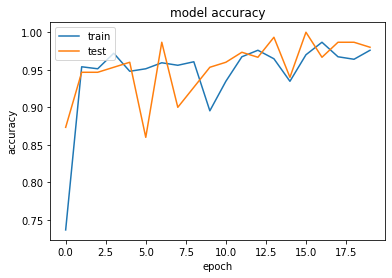

loss: 0.19751310348510742 accuracy: 0.9760000109672546


In [531]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('loss:', history.history['loss'][-1], 'accuracy:', history.history['Accuracy'][-1])


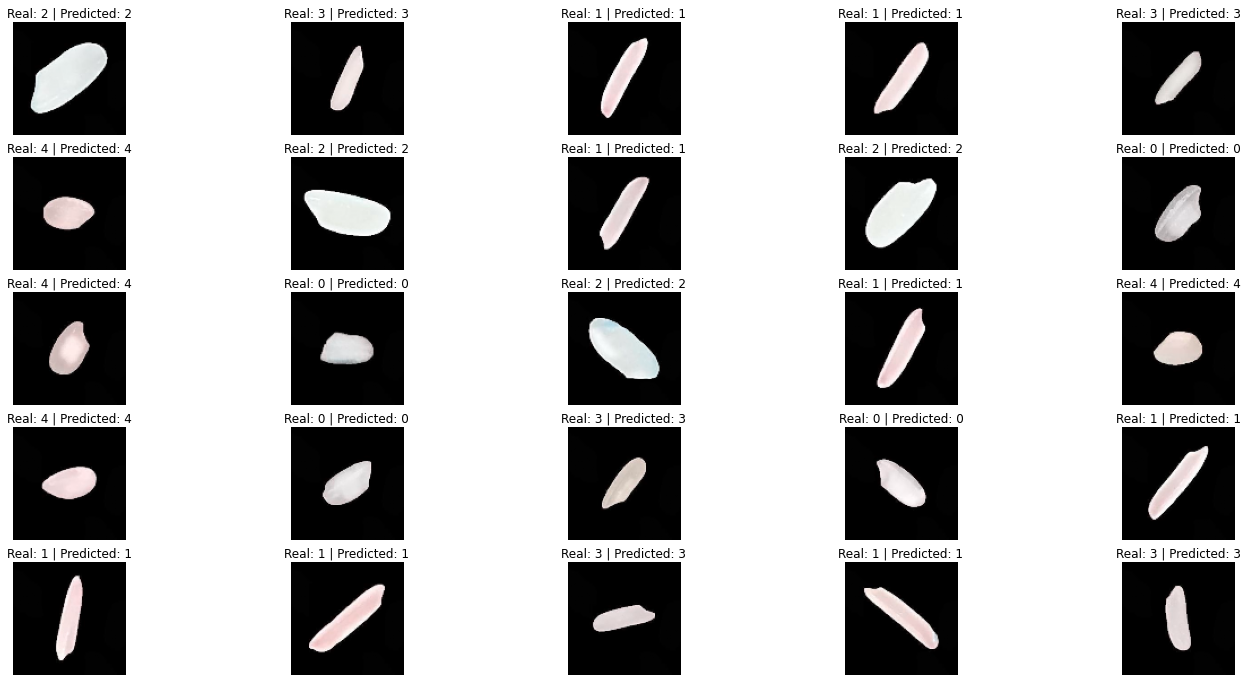

In [532]:
plt.figure(figsize=(24, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    result = model.predict(X_test[i].reshape(1, 100, 100, 3))
    plt.title('Real: {} | Predicted: {}'.format(y_test[i], np.argmax(result)))
    plt.axis('off')
plt.show()
